<a href="https://colab.research.google.com/github/yawpAI/colab/blob/main/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [ ]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()


In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-04-11 21:01:08--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.222.240.112, 54.175.245.12, 34.225.127.47, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.222.240.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14746350 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.06M  76.0MB/s    in 0.2s    

2021-04-11 21:01:09 (76.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14746350/14746350]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


In [ ]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://1faaca223273.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://1faaca223273.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [15]:
!pip install pyarrow

In [17]:
df = spark.createDataFrame([{'hello':'cat'} for x in range(1000)])
df.show(5, False)

+-----+
|hello|
+-----+
|cat  |
|cat  |
|cat  |
|cat  |
|cat  |
+-----+
only showing top 5 rows



In [28]:
path = '/content/drive/MyDrive/1CodeScripts/section2/cancer_tumor.csv'
dataset = spark.read.csv(path, inferSchema=True, header=True)

In [24]:
dataset.printSchema()

root
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radius_worst: double (nullable = true)


In [25]:
dataset.show()

+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---------+-----------+------------+--------------+---------+-----

In [33]:
path_land = '/content/drive/MyDrive/1CodeScripts/section3/ Countries_LandCvr_Elnino.csv'
# note the space to start the file name, pulled from file tree to the left /content/drive/MyDrive/1CodeScripts/section3/ Countries_LandCvr_Elnino.csv
df2= spark.read.csv(path_land, header=True, inferSchema=True)
df2.show()

+-------+---------+--------------------+-----+
| NAME_0| yearType|             lndcvr_|    n|
+-------+---------+--------------------+-----+
|Bolivia|   ElNino|Barren or sparsel...|   21|
|Bolivia|   ElNino|   Closed shrublands|   18|
|Bolivia|   ElNino|           Croplands| 1485|
|Bolivia|   ElNino|Deciduous Broadle...|  105|
|Bolivia|   ElNino|Deciduous Needlel...|    1|
|Bolivia|   ElNino|Evergreen Broadle...|11514|
|Bolivia|   ElNino|Evergreen Needlel...|   95|
|Bolivia|   ElNino|          Grasslands| 9428|
|Bolivia|   ElNino|        Mixed forest|  604|
|Bolivia|   ElNino|     Open shrublands|   37|
|Bolivia|   ElNino|            Savannas|24447|
|Bolivia|   ElNino|  Urban and built-up|    9|
|Bolivia|   ElNino|      Woody savannas| 7426|
|Bolivia|NonElNino|Barren or sparsel...|    6|
|Bolivia|NonElNino|   Closed shrublands|   16|
|Bolivia|NonElNino|           Croplands|  467|
|Bolivia|NonElNino|Deciduous Broadle...|   27|
|Bolivia|NonElNino|Deciduous Needlel...|    1|
|Bolivia|NonE

In [34]:
df2.printSchema()

root
 |-- NAME_0: string (nullable = true)
 |-- yearType: string (nullable = true)
 |-- lndcvr_: string (nullable = true)
 |-- n: integer (nullable = true)



In [36]:
df2.summary().show()

+-------+---------+---------+--------------------+------------------+
|summary|   NAME_0| yearType|             lndcvr_|                 n|
+-------+---------+---------+--------------------+------------------+
|  count|      153|      153|                 153|               153|
|   mean|     null|     null|                null|2419.4640522875816|
| stddev|     null|     null|                null| 9841.475254480629|
|    min|  Bolivia|   ElNino|Barren or sparsel...|                 1|
|    25%|     null|     null|                null|                 6|
|    50%|     null|     null|                null|                46|
|    75%|     null|     null|                null|               613|
|    max|Venezuela|NonElNino|      Woody savannas|             99296|
+-------+---------+---------+--------------------+------------------+



In [37]:
df2.describe().show()

+-------+---------+---------+--------------------+------------------+
|summary|   NAME_0| yearType|             lndcvr_|                 n|
+-------+---------+---------+--------------------+------------------+
|  count|      153|      153|                 153|               153|
|   mean|     null|     null|                null|2419.4640522875816|
| stddev|     null|     null|                null| 9841.475254480629|
|    min|  Bolivia|   ElNino|Barren or sparsel...|                 1|
|    max|Venezuela|NonElNino|      Woody savannas|             99296|
+-------+---------+---------+--------------------+------------------+



In [39]:
country_counts = df2.select(['NAME_0','n']).show()

+-------+-----+
| NAME_0|    n|
+-------+-----+
|Bolivia|   21|
|Bolivia|   18|
|Bolivia| 1485|
|Bolivia|  105|
|Bolivia|    1|
|Bolivia|11514|
|Bolivia|   95|
|Bolivia| 9428|
|Bolivia|  604|
|Bolivia|   37|
|Bolivia|24447|
|Bolivia|    9|
|Bolivia| 7426|
|Bolivia|    6|
|Bolivia|   16|
|Bolivia|  467|
|Bolivia|   27|
|Bolivia|    1|
|Bolivia| 3507|
|Bolivia|   36|
+-------+-----+
only showing top 20 rows



In [49]:
df2.filter((df2["n"] > 1000)).groupBy(["lndcvr_"]).count().show() #land cover counts for number of fires > 1000

+--------------------+-----+
|             lndcvr_|count|
+--------------------+-----+
|      Woody savannas|    5|
|        Mixed forest|    1|
|            Savannas|    8|
|           Croplands|    3|
|Evergreen Broadle...|   10|
|          Grasslands|    7|
+--------------------+-----+



In [51]:
df2.filter((df2["n"] > 1000)).count()


34

In [52]:
for col in df2.columns:
  if col != 'n':
    print('col = ' + col)
    df2.groupBy(col).count().orderBy('count', ascending=False).show(truncate=False)

col = NAME_0
+---------+-----+
|NAME_0   |count|
+---------+-----+
|Bolivia  |26   |
|Brazil   |26   |
|Guyana   |24   |
|Venezuela|24   |
|Peru     |22   |
|Colombia |22   |
|Ecuador  |9    |
+---------+-----+

col = yearType
+---------+-----+
|yearType |count|
+---------+-----+
|ElNino   |79   |
|NonElNino|74   |
+---------+-----+

col = lndcvr_
+----------------------------+-----+
|lndcvr_                     |count|
+----------------------------+-----+
|Evergreen Needleleaf forest |14   |
|Evergreen Broadleaf forest  |14   |
|Savannas                    |13   |
|Woody savannas              |13   |
|Mixed forest                |13   |
|Grasslands                  |13   |
|Croplands                   |12   |
|Closed shrublands           |12   |
|Deciduous Broadleaf forest  |12   |
|Barren or sparsely vegetated|12   |
|Urban and built-up          |11   |
|Open shrublands             |8    |
|Deciduous Needleleaf forest |6    |
+----------------------------+-----+



In [55]:
path_glass = '/content/drive/MyDrive/1CodeScripts/section5/glassClass.csv'
df_glass = spark.read.csv(path_glass, header=True, inferSchema=True)
df_glass.printSchema()

root
 |-- RI: double (nullable = true)
 |-- Na: double (nullable = true)
 |-- Mg: double (nullable = true)
 |-- Al: double (nullable = true)
 |-- Si: double (nullable = true)
 |-- K: double (nullable = true)
 |-- Ca: double (nullable = true)
 |-- Ba: double (nullable = true)
 |-- Fe: double (nullable = true)
 |-- Type: integer (nullable = true)



In [56]:
df_glass.summary().show()

+-------+--------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+------------------+
|summary|                  RI|                Na|               Mg|                Al|                Si|                  K|                Ca|                 Ba|                  Fe|              Type|
+-------+--------------------+------------------+-----------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+------------------+
|  count|                 214|               214|              214|               214|               214|                214|               214|                214|                 214|               214|
|   mean|  1.5183654205607469|13.407850467289723|2.684532710280374|1.4449065420560752| 72.65093457943925|0.49705607476635494|  8.95696261682243|0.17504672897196263|0.05700934579439

In [57]:
df_glass2 = df_glass.drop('Type')
df_glass2.show(5)

+-------+-----+----+----+-----+----+----+---+---+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba| Fe|
+-------+-----+----+----+-----+----+----+---+---+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0|0.0|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0|0.0|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0|0.0|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0|0.0|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0|0.0|
+-------+-----+----+----+-----+----+----+---+---+
only showing top 5 rows



In [97]:
from pyspark.mllib.stat import Statistics
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler, StandardScaler



In [98]:
df_glass2.columns

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [99]:
assembler = VectorAssembler(inputCols=df_glass2.columns, outputCol="Predictors")
output = assembler.transform(df_glass2)

In [100]:
output.show()

+-------+-----+----+----+-----+----+----+---+----+--------------------+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|          Predictors|
+-------+-----+----+----+-----+----+----+---+----+--------------------+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|[1.52101,13.64,4....|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|[1.51761,13.89,3....|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|[1.51618,13.53,3....|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|[1.51766,13.21,3....|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|[1.51742,13.27,3....|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|[1.51596,12.79,3....|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|[1.51743,13.3,3.6...|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|[1.51756,13.15,3....|
|1.51918|14.04|3.58|1.37|72.08|0.56| 8.3|0.0| 0.0|[1.51918,14.04,3....|
|1.51755| 13.0| 3.6|1.36|72.99|0.57| 8.4|0.0|0.11|[1.51755,13.0,3.6...|
|1.51571|12.72|3.46|1.56| 73.2|0.67|8.09|0.0|0.24|[1.51571,12.72

In [101]:
scaler = StandardScaler(inputCol = "Predictors", outputCol="Standardized", withStd=True, withMean=True)
scaled_output = scaler.fit(output).transform(output)


In [94]:
scaled_output.show()


+-------+-----+----+----+-----+----+----+---+----+--------------------+--------------------+
|     RI|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|          Predictors|        Standardized|
+-------+-----+----+----+-----+----+----+---+----+--------------------+--------------------+
|1.52101|13.64|4.49| 1.1|71.78|0.06|8.75|0.0| 0.0|[1.52101,13.64,4....|[0.87082584738783...|
|1.51761|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|[1.51761,13.89,3....|[-0.2487502323371...|
|1.51618|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|[1.51618,13.53,3....|[-0.7196307599860...|
|1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|[1.51766,13.21,3....|[-0.2322858782234...|
|1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|[1.51742,13.27,3....|[-0.3113147779687...|
|1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|[1.51596,12.79,3....|[-0.7920739180859...|
|1.51743| 13.3| 3.6|1.14|73.09|0.58|8.17|0.0| 0.0|[1.51743,13.3,3.6...|[-0.3080219071460...|
|1.51756|13.15|3.61|1.05|73.24|0.57|8.24|0.0| 0.0|[1.51756,13.15,3....

In [84]:
import numpy as np
np.array(scaled_output.select('Standardized').collect())

array([[[ 0.87082585,  0.2842867 ,  1.25170374, ..., -0.14542537,
         -0.35205138, -0.58507908]],

       [[-0.24875023,  0.59043281,  0.63467992, ..., -0.79187707,
         -0.35205138, -0.58507908]],

       [[-0.71963076,  0.14958242,  0.60001566, ..., -0.82701032,
         -0.35205138, -0.58507908]],

       ...,

       [[ 0.7522825 ,  1.16598749, -1.86114678, ..., -0.36325148,
          2.94629228, -0.58507908]],

       [[-0.61096602,  1.19047918, -1.86114678, ..., -0.33514489,
          2.80550932, -0.58507908]],

       [[-0.41339377,  1.00679152, -1.86114678, ..., -0.2367718 ,
          3.00662784, -0.58507908]]])

In [87]:
import pandas as pd
df = pd.read_csv(path_glass)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [90]:
df.drop(columns=["Type"])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(df) 

In [92]:
X_train

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [-0.61239854,  1.19327046, -1.86551055, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [-0.41436305,  1.00915211, -1.86551055, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [103]:
boston_path = '/content/drive/MyDrive/1CodeScripts/section2/Boston.csv'
boston = spark.read.csv(boston_path, header=True, inferSchema=True)
boston.summary().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              _c0|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|             black|             lstat|              medv|
+-------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|              506|               506|               506|               506|               506|                50

In [104]:
boston = boston.drop('_c0')

In [105]:
boston.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [106]:
bost_df = boston.toPandas()
bost_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [118]:
def high_price(medv):
  if medv > 100.0:
    return 'high'
  else:
    return 'low'

from pyspark.sql.functions import udf
high_price_udf = udf(high_price)
boston3 = boston.withColumn('Price Band', high_price_udf('medv'))
boston3.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+----------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|Price Band|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+----------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|       low|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|       low|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|       low|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|       low|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|       low|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|       low|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|       low|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96

In [113]:
boston.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [120]:
boston.dtypes

[('crim', 'double'),
 ('zn', 'double'),
 ('indus', 'double'),
 ('chas', 'int'),
 ('nox', 'double'),
 ('rm', 'double'),
 ('age', 'double'),
 ('dis', 'double'),
 ('rad', 'int'),
 ('tax', 'int'),
 ('ptratio', 'double'),
 ('black', 'double'),
 ('lstat', 'double'),
 ('medv', 'double')]

In [121]:
numeric_features = [t[0] for t in boston.dtypes if t[1] != 'string'] ## retain non-string colums
numeric_features_df=boston.select(numeric_features)
numeric_features_df.toPandas().head() ##convert to pandas df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [124]:
boston.stat.corr('black', 'medv')

0.3334608196570662

In [125]:
boston_assembler = VectorAssembler(inputCols=boston.columns, outputCol="Predictors")
output = boston_assembler.transform(boston)
output.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|          Predictors|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5

In [129]:
from pyspark.ml.stat import Correlation



In [130]:
matrix = Correlation.corr(output.select(['Predictors']), "Predictors").collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)

[[1.0, -0.20046921966254821, 0.40658341140625986, -0.05589158222224122, 0.42097171139245615, -0.219246702862514, 0.3527342509013635, -0.3796700869510246, 0.6255051452626013, 0.5827643120325848, 0.28994557927952075, -0.38506394199422384, 0.4556214794479462, -0.3883046085868113], [-0.20046921966254821, 1.0, -0.5338281863044748, -0.04269671929612121, -0.5166037078279848, 0.31199058737409197, -0.5695373420992127, 0.664408222762113, -0.3119478260185375, -0.3145633246775989, -0.39167854793621926, 0.17552031738282786, -0.41299457452700433, 0.36044534245054427], [0.40658341140625986, -0.5338281863044748, 1.0, 0.06293802748966379, 0.7636514469209146, -0.3916758526568437, 0.6447785113552555, -0.7080269887427688, 0.5951292746038489, 0.7207601799515443, 0.38324755642888764, -0.35697653510419286, 0.6037997164766219, -0.48372516002837335], [-0.05589158222224122, -0.04269671929612121, 0.06293802748966379, 1.0, 0.09120280684249463, 0.09125122504345601, 0.08651777425454256, -0.09917578017472718, -0.007

In [131]:
df = spark.createDataFrame(corrmatrix,boston.columns) ##list of correlations, names of columns
df.show()

+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                crim|                  zn|               indus|                chas|                nox|                  rm|                 age|                 dis|                 rad|                 tax|             ptratio|               black|               lstat|                medv|
+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|-0.20046921966254821| 0.40658341140625986|-0.05589158222224122|0.42097171139245615|  -0.21924

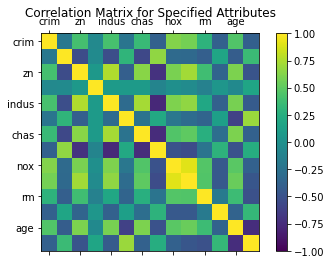

In [134]:
import matplotlib.pyplot as plt

def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1) ## correlation go from -1 to 1
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(corrmatrix, boston.columns, 1) 

In [147]:
bos_cols = boston.columns
bos_cols.remove('medv')
bos_cols

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [149]:
boston_feature_assembler = VectorAssembler(inputCols=bos_cols, outputCol="Features")
output = boston_feature_assembler.transform(boston)
output.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|            Features|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5

In [150]:
sample = output.select(["Features", "medv"])
sample.show()

+--------------------+----+
|            Features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [156]:
from pyspark.ml.regression import LinearRegression

###split data into training and testing
train_data,test_data=sample.randomSplit([0.7,0.3], seed=123224) ##70% for training
regressor=LinearRegression(featuresCol="Features",labelCol="medv")
lr_model = regressor.fit(train_data) ##.fit 
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.901903
r2: 0.713853


In [157]:
lr_model_test = regressor.fit(test_data)
testSummary = lr_model_test.summary
print("RMSE: %f" % testSummary.rootMeanSquaredError)
print("r2: %f" % testSummary.r2)

RMSE: 3.164129
r2: 0.881972


In [165]:
test_vector = sample.select(["Features"]).collect()[0]
test_vector

Row(Features=DenseVector([0.0063, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]))

In [167]:
predictions = lr_model.transform(test_data)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 15.35803042656552|18.9|[0.0136,75.0,4.0,...|
| 33.47351841897182|31.6|[0.01432,100.0,1....|
|30.094086502130285|32.9|[0.01778,95.0,1.4...|
|25.252489925226165|23.1|[0.0187,85.0,4.15...|
|19.843430850693725|20.1|[0.01965,80.0,1.7...|
|29.637931256874253|34.7|[0.02729,0.0,7.07...|
|24.753019087567218|21.6|[0.02731,0.0,7.07...|
|20.603438677724093|26.6|[0.02899,40.0,1.2...|
|19.142848720504865|18.5|[0.03041,0.0,5.19...|
|27.507069833092466|33.4|[0.03237,0.0,2.18...|
| 41.66712098105411|48.5|[0.0351,95.0,2.68...|
| 28.74344705110721|22.0|[0.03537,34.0,6.0...|
| 32.63594853712715|27.9|[0.03615,80.0,4.9...|
| 20.89570541434574|20.7|[0.03738,0.0,5.19...|
| 33.97299217338271|34.6|[0.03768,80.0,1.5...|
|29.713762579977438|22.9|[0.04203,28.0,15....|
| 14.57511786189906|18.2|[0.04301,80.0,1.9...|
| 24.03751816469471|20.5|[0.04337,21.0,5.6...|
|30.478252341